In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics

In [2]:
architectures = ['BRC', 'GRU', 'Ladder', 'Laguerre', 'LMU', 'LSTM', 'nBRC']
#architectures = ['Laguerre']

for seed in range(1, 6):
    
    for architecture in architectures:
    
        test_set = pd.read_csv(f'{architecture}_x_test_{seed}.csv')
        predictions = pd.read_csv(f'{architecture}_predictions_{seed}.csv')

In [3]:
for architecture in architectures:
    
    df_arch = pd.DataFrame(columns = range(1, 6))
    
    final_error_arch = []
    
    for seed in range(1, 6):
        
        #fig, axes = plt.subplots(figsize = (10, 6))
        
        error = pd.read_csv(f"{architecture}_error_{seed}.csv")
        
        df_arch[seed] = error['0'].values
        final_error_arch.append(df_arch[seed].values[-1])
        
    print(f'Architecture: {architecture}\nMin: {min(final_error_arch):.4f}\nMax: {max(final_error_arch):.4f}\nAvg: {statistics.mean(final_error_arch):.4f}')
    print(f'Std_dev: {np.std(final_error_arch):.4f}\n')
        
    df_arch.to_csv(f'{architecture}_error_all_seeds.csv')

Architecture: BRC
Min: 0.5618
Max: 0.9587
Avg: 0.7846
Std_dev: 0.1754

Architecture: GRU
Min: 0.3732
Max: 0.4449
Avg: 0.4157
Std_dev: 0.0284

Architecture: Ladder
Min: 0.4753
Max: 0.5882
Avg: 0.5348
Std_dev: 0.0373

Architecture: Laguerre
Min: 0.3476
Max: 0.6660
Avg: 0.5166
Std_dev: 0.1338

Architecture: LMU
Min: 1.3939
Max: 1.3977
Avg: 1.3952
Std_dev: 0.0013

Architecture: LSTM
Min: 0.5782
Max: 0.6051
Avg: 0.5955
Std_dev: 0.0097

Architecture: nBRC
Min: 0.5738
Max: 0.6455
Avg: 0.5939
Std_dev: 0.0266



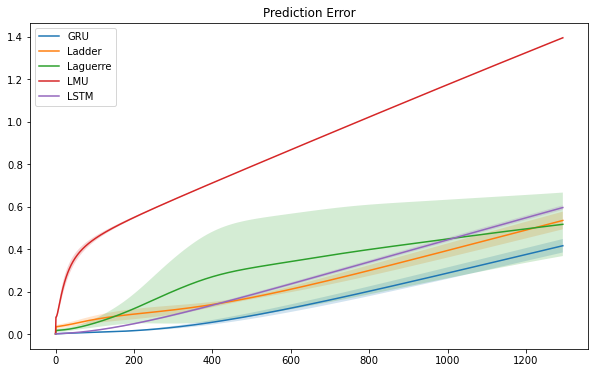

In [4]:
fig, axes = plt.subplots(figsize = (10, 6))

for architecture in architectures:
    
    if architecture in ['BRC', 'nBRC']:
        continue
    
    df_error = pd.read_csv(f'{architecture}_error_all_seeds.csv')
    
    df_error.drop('Unnamed: 0', axis = 1, inplace = True)
    
    #df_error.plot()
    
    df_error.mean(axis = 0)

    axes.plot(df_error.mean(axis = 1), label = f"{architecture}")
    axes.fill_between(x = range(df_error.index.start, df_error.index.stop),
                      y1 = df_error.mean(axis = 1) - df_error.std(axis = 1),
                      y2 = df_error.mean(axis = 1) + df_error.std(axis = 1), 
                      alpha = 0.2)
    
axes.set_title('Prediction Error');
axes.legend()

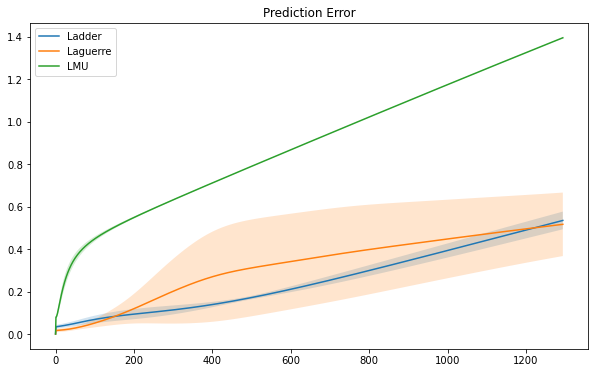

In [5]:
fig, axes = plt.subplots(figsize = (10, 6))

for architecture in architectures:
    
    if architecture in ['BRC', 'nBRC', 'LSTM', 'GRU']:
        continue
    
    df_error = pd.read_csv(f'{architecture}_error_all_seeds.csv')
    
    df_error.drop('Unnamed: 0', axis = 1, inplace = True)
    
    #df_error.plot()
    
    df_error.mean(axis = 0)

    axes.plot(df_error.mean(axis = 1), label = f"{architecture}")
    axes.fill_between(x = range(df_error.index.start, df_error.index.stop),
                      y1 = df_error.mean(axis = 1) - df_error.std(axis = 1),
                      y2 = df_error.mean(axis = 1) + df_error.std(axis = 1), 
                      alpha = 0.2)
    
axes.set_title('Prediction Error');
axes.legend()